In [49]:
import glob,os
import pandas as pd
import numpy as np
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import warnings
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.dates as mdates
from datetime import datetime, timedelta

warnings.filterwarnings("ignore")

In [50]:
oripath = '../Results/soundsepration/'
dp = pd.read_csv('../Results/soundsepration/experiment_period.txt')

In [51]:
def figure_base_setting(ax):
    ax[0].set_xlim(datetime(2021, 4, 1) ,datetime(2022, 1, 10))
    ax[1].set_xlim(datetime(2022, 4, 1) ,datetime(2023, 1, 10))
    ax[2].set_xlim(datetime(2023, 4, 1) ,datetime(2024, 1, 10))

    ax[0].grid(axis='y', color='lightgrey')
    ax[1].grid(axis='y', color='lightgrey')
    ax[2].grid(axis='y', color='lightgrey')

    ax[0].yaxis.set_minor_locator(MultipleLocator(0.25))
    ax[0].yaxis.set_major_locator(MultipleLocator(0.5))
    
    ax[0].yaxis.set_ticks_position('both')
    ax[1].yaxis.set_ticks_position('both')
    ax[2].yaxis.set_ticks_position('both')

    ax[0].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax[1].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax[2].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    
    ax[1].xaxis.set_major_formatter(mdates.DateFormatter("%b"))
    ax[0].xaxis.set_major_formatter(mdates.DateFormatter("%b"))
    ax[2].xaxis.set_major_formatter(mdates.DateFormatter("%b"))


../Results/soundsepration/Keelung-5min/20240125_160851_2023_4stage_separation/stats.log
../Results/soundsepration/Keelung-5min/20231206_162010_2021_3stage_separation/stats.log
../Results/soundsepration/Keelung-5min/20240129_100849_2022_3stage_separation/stats.log
../Results/soundsepration/Taoyuan-5min/20231206_161629_2021_3stage_separation/stats.log
../Results/soundsepration/Taoyuan-5min/20231206_161522_2022_3stage_separation/stats.log
../Results/soundsepration/Taoyuan-5min/20240125_161423_2023_4stage_separation/stats.log


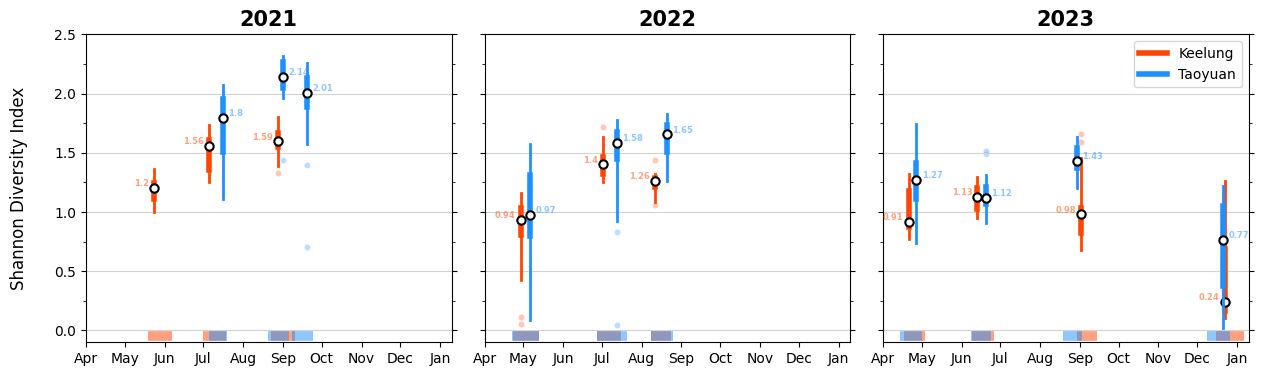

In [54]:
plt.rcParams["font.family"] = "DejaVu Sans"
fig, ax = plt.subplots(1,3,figsize=(15,4), sharey=True)
plt.subplots_adjust(wspace = 0.09) 

            
# for idx in range(1, 5):
#     dp_ = dp[dp['region']=='Keelung'][dp['year']==int('2023')][dp['index']==idx]
#     begin = dp_['begin'].values[0]; end = dp_['end'].values[0]
#     begintime = datetime.strptime(begin, "%Y-%m-%dT%H:%M:%S")
#     endtime = datetime.strptime(end, "%Y-%m-%dT%H:%M:%S") 
#     ax[1].hlines(xmin=begintime, xmax=endtime, y=-0.05, lw=7, color='orangered', alpha=0.5)   
    
for path in glob.glob(f'{oripath}/*-5min/*202?_*stage_separation/*log'):
    year = path.rsplit('_')[2]
    if int(year) == 2023 and '3stage' in path:
        continue 
    else:
        
        color = 'orangered' if 'Keelung' in path else 'dodgerblue'
        region = 'Keelung' if 'Keelung' in path else 'Taoyuan'
        dx = -0.15 if 'Keelung' in path else 0.15

        cmd = ''' awk -F, 'NR>1 {print $0}' %(path)s
        '''%locals()
        response = os.popen(cmd).read()
        res_year = response.rsplit('\n')

        print(path)
        if int(year) == 2021:
            pidx = 0 
        elif int(year) == 2022:
            pidx = 1
        elif int(year) == 2023:
            pidx = 2  
        ax[pidx].set_title(year, fontsize=15, fontweight='bold')

        readcol = 3 if int(year) != 2023 else 4
        for info in res_year[:readcol]:
            stats = info.split(',', 7)
            idx  = int(stats[1])
            Q1   = float(stats[2])
            Q2   = float(stats[3])
            Q3   = float(stats[4])
            minn = float(stats[5])
            maxx = float(stats[6])
            drop = stats[7]
            dp_ = dp[dp['region']==region][dp['year']==int(year)][dp['index']==idx]
            begin = dp_['begin'].values[0]; end = dp_['end'].values[0]
            begintime = datetime.strptime(begin, "%Y-%m-%dT%H:%M:%S")
            endtime = datetime.strptime(end, "%Y-%m-%dT%H:%M:%S")
            dt = endtime - begintime
            ddt = -4 if region == 'Keelung' else 4
            plottime = begintime + timedelta(days=dt.days/2+ddt)      

            ax[pidx].hlines(xmin=begintime, xmax=endtime, y=-0.05, lw=7, color=color, alpha=0.5)
            ax[pidx].plot([plottime, plottime], [minn, maxx], lw=2, color=color)
            ax[pidx].plot([plottime, plottime], [Q1, Q3], lw=4, color=color, label = region)
            ax[pidx].plot([plottime], [Q2], marker = 'o', markersize = 6, color='white', mec='k', mew=1.5)# ,edgecolors='k', lw=2
            if region == 'Keelung':
                ax[pidx].text(plottime + timedelta(days=-4), Q2, float("{:.2f}".format(Q2,2)), color=color, alpha=0.5,
                              ha='right', va ='bottom', fontsize=6, fontweight='heavy')
            else:
                ax[pidx].text(plottime + timedelta(days=+4), Q2, float("{:.2f}".format(Q2,2)), color=color, alpha=0.5,
                              ha='left', va ='bottom', fontsize=6, fontweight='heavy')
            if 'nan' not in drop :
                drop_num = eval(drop)
                ax[pidx].scatter([plottime]*len(drop_num), drop_num,  marker='o', s=5, color='white', edgecolors=color, lw=2, alpha=0.3)

figure_base_setting(ax)
    
ax[0].set_ylim(-0.1, 2.5)
ax[0].set_ylabel('Shannon Diversity Index\n', fontsize=12)

handles, labels = ax[2].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), fontsize=10)


plt.savefig('../Results/soundsepration/Finalresults/Index_3year_v2.pdf', dpi=200, transparent=True, )
plt.savefig('../Results/soundsepration/Finalresults/Index_3year_v2.png', dpi=200, bbox_inches='tight', transparent=True, )

In [48]:
res_year

['2023,1,1.110000,1.268000,1.417000,0.734875,1.739735,[nan]',
 '2023,2,1.064000,1.122000,1.214000,0.910032,1.309788,[1.5165777479451394, 1.490321803326046]',
 '2023,3,1.368000,1.434000,1.536000,1.201537,1.636306,[nan]',
 '2023,4,0.378000,0.767000,1.051000,0.023129,1.222411,[nan]',
 '']